<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.331914,2.126274,34.458188,32.166889,2.291299
1,0.0,1.0,51.529956,6.760338,68.290294,58.954652,9.335642
2,0.0,2.0,61.959948,-4.079780,67.880168,68.523655,-0.643487
3,0.0,3.0,90.195888,-12.544976,87.650913,94.428738,-6.777825
4,0.0,4.0,87.284543,-11.834620,85.449923,91.757722,-6.307798
...,...,...,...,...,...,...,...
119995,999.0,115.0,36.519341,-4.051025,42.468316,47.951824,-5.483507
119996,999.0,116.0,81.855836,-13.410170,78.445665,92.010211,-13.564546
119997,999.0,117.0,44.432885,-0.074839,54.358047,55.642273,-1.284226
119998,999.0,118.0,25.226066,6.749216,41.975281,36.976923,4.998358


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.331914,2.126274,34.458188,32.166889,2.291299
1,0.0,1.0,51.529956,6.760338,68.290294,58.954652,9.335642
2,0.0,2.0,61.959948,-4.079780,67.880168,68.523655,-0.643487
3,0.0,3.0,90.195888,-12.544976,87.650913,94.428738,-6.777825
4,0.0,4.0,87.284543,-11.834620,85.449923,91.757722,-6.307798
...,...,...,...,...,...,...,...
119995,999.0,115.0,36.519341,-4.051025,42.468316,47.951824,-5.483507
119996,999.0,116.0,81.855836,-13.410170,78.445665,92.010211,-13.564546
119997,999.0,117.0,44.432885,-0.074839,54.358047,55.642273,-1.284226
119998,999.0,118.0,25.226066,6.749216,41.975281,36.976923,4.998358


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e          Y      y_hat      e_hat
rep   index                                                       
0.0   0.0    22.331914   2.126274  34.458188  32.166889   2.291299
      1.0    51.529956   6.760338  68.290294  58.954652   9.335642
      2.0    61.959948  -4.079780  67.880168  68.523655  -0.643487
      3.0    90.195888 -12.544976  87.650913  94.428738  -6.777825
      4.0    87.284543 -11.834620  85.449923  91.757722  -6.307798
...                ...        ...        ...        ...        ...
999.0 115.0  36.519341  -4.051025  42.468316  47.951824  -5.483507
      116.0  81.855836 -13.410170  78.445665  92.010211 -13.564546
      117.0  44.432885  -0.074839  54.358047  55.642273  -1.284226
      118.0  25.226066   6.749216  41.975281  36.976923   4.998358
      119.0  33.714985   6.971587  50.686572  45.226526   5.460045

[120000 rows x 5 columns]

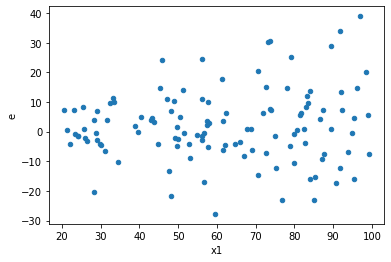

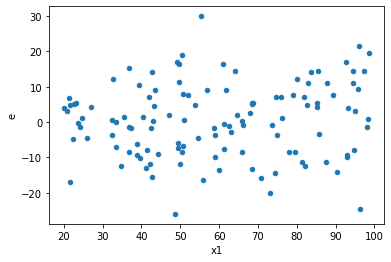

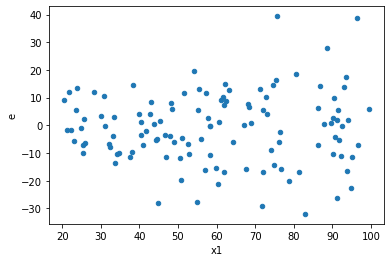

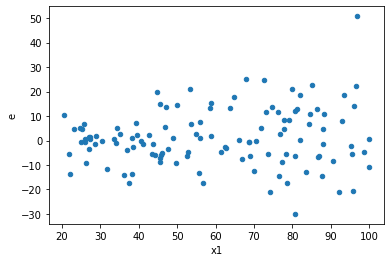

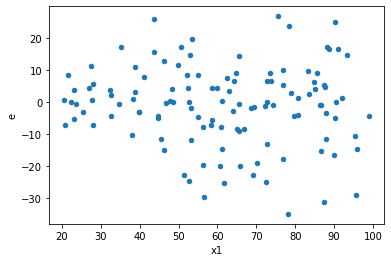

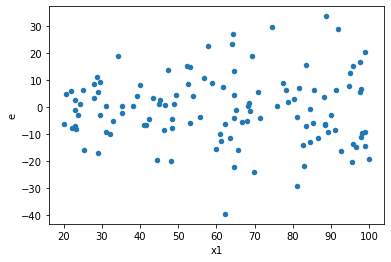

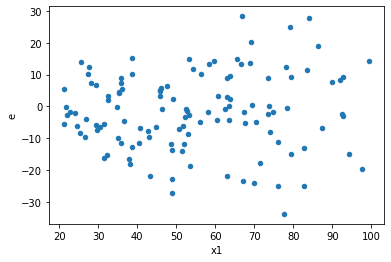

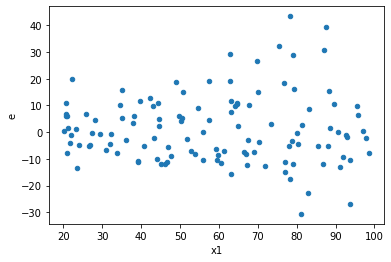

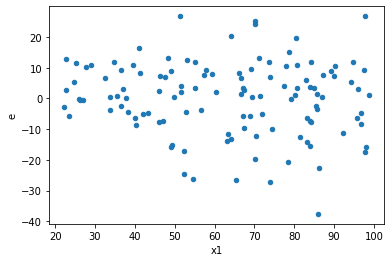

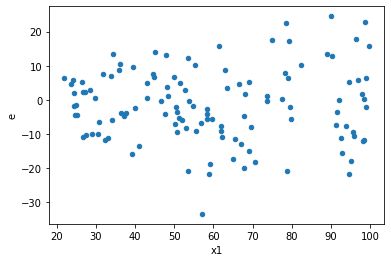

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,65.0,53.0,5617.154217457585,6851.901245985649,86.41775719165516,129.2811555846349,1.4960022081794875,0.13149948338590423,0.9342502583070479,0.06574974169295211,Reject005=1 : Homoscedasticity
2.0,46.0,72.0,2381.8731196295976,13951.026325663961,51.779850426730384,193.76425452311057,3.742078297373439,5.527032551633226e-07,0.9999997236483724,2.763516275816613e-07,Reject005=0 : Heteroscedasticity
6.0,47.0,71.0,2651.8500718576906,10616.72962826303,56.42234195441895,149.53140321497227,2.6502161738655214,0.00020122336489802883,0.999899388317551,0.00010061168244901442,Reject005=0 : Heteroscedasticity
8.0,63.0,55.0,3375.4928770392853,10125.625029757777,53.57925201649659,184.10227326832322,3.4360739715373354,6.513366402449705e-06,0.9999967433167988,3.2566832012248526e-06,Reject005=0 : Heteroscedasticity
9.0,59.0,59.0,5400.594680970767,12933.60830432187,91.53550306730114,219.21370007325203,2.3948489135639095,0.0010047983995074006,0.9994976008002463,0.0005023991997537003,Reject005=0 : Heteroscedasticity
13.0,60.0,58.0,4320.7697875712165,11767.901383548999,72.01282979285361,202.89485144049996,2.8174819962516566,0.0001108465209911369,0.9999445767395044,5.542326049556845e-05,Reject005=0 : Heteroscedasticity
20.0,51.0,67.0,4792.205448339314,11483.132528824764,93.96481271253556,171.3900377436532,1.823981049884949,0.02127201877423257,0.9893639906128837,0.010636009387116285,Reject005=0 : Heteroscedasticity
21.0,54.0,64.0,4566.435726531546,14598.790126449418,84.563624565399,228.10609572577215,2.6974493690175456,0.00016610474000722242,0.9999169476299964,8.305237000361121e-05,Reject005=0 : Heteroscedasticity
24.0,62.0,56.0,7398.656007629012,13928.268670875985,119.33316141337116,248.71908340849973,2.084241131825332,0.0058957761242930395,0.9970521119378535,0.0029478880621465198,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,65.0,53.0,5617.154217457585,6851.901245985649,86.41775719165516,129.2811555846349,1.4960022081794875,0.13149948338590423,Reject005=1 : Homoscedasticity
1.0,70.0,48.0,16363.358445525551,4408.508107235702,233.76226350750787,91.84391890074379,0.3928945481732726,0.00036269607394240664,Reject005=0 : Heteroscedasticity
2.0,46.0,72.0,2381.8731196295976,13951.026325663961,51.779850426730384,193.76425452311057,3.742078297373439,5.527032551633226e-07,Reject005=0 : Heteroscedasticity
3.0,71.0,47.0,15042.093142701213,4492.868465707266,211.86046679860863,95.592946078878,0.45120709646008295,0.0023655524589959627,Reject005=0 : Heteroscedasticity
4.0,54.0,64.0,8725.035419356162,4637.28255037558,161.57472998807705,72.45753984961844,0.44844599062591806,0.002912052241454359,Reject005=0 : Heteroscedasticity
5.0,62.0,56.0,16169.65896052603,3518.7407538438365,260.8009509762263,62.83465631863994,0.24092955214863354,1.2067513718268236e-07,Reject005=0 : Heteroscedasticity
6.0,47.0,71.0,2651.8500718576906,10616.72962826303,56.42234195441895,149.53140321497227,2.6502161738655214,0.00020122336489802883,Reject005=0 : Heteroscedasticity
7.0,59.0,59.0,10314.209332447512,3912.366625861996,174.81710732961884,66.31129874342366,0.37931813285523175,0.0002741737787486735,Reject005=0 : Heteroscedasticity
8.0,63.0,55.0,3375.4928770392853,10125.625029757777,53.57925201649659,184.10227326832322,3.4360739715373354,6.513366402449705e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    863
Reject005=1 : Homoscedasticity      137
Name: Result_test, dtype: int64